# Mini-Projet
## ZHU Fangda

## Exercice 1 (Analyse exploratoire (2pts)):

In [17]:
filesSize<-read.table("xn.txt"， header = T)
mydata = filesSize$Byte
cat("Nombre de fichier："，nrow(filesSize))

Nombre de fichier: 400

Sachant que il y a 400 tailles de fichers dans le jeu de donnée. On peut supposer que le taille de chaque ficher est un variable aléatoire i.i.d. On a alors construire un espace d'observation $\chi \subset \mathbb R^{400}_+$. Donc les observation venant du jeu de donnée est éctit par  $X =(X_1,X_2,...，X_n  )$.Dans le reste de partie, on utilise le $x$ pour exprimer le taille de ficher. On peut tout d'abord tracer le histogramme de logarithme népérien de la taille de ficher en échelle logarithmique.

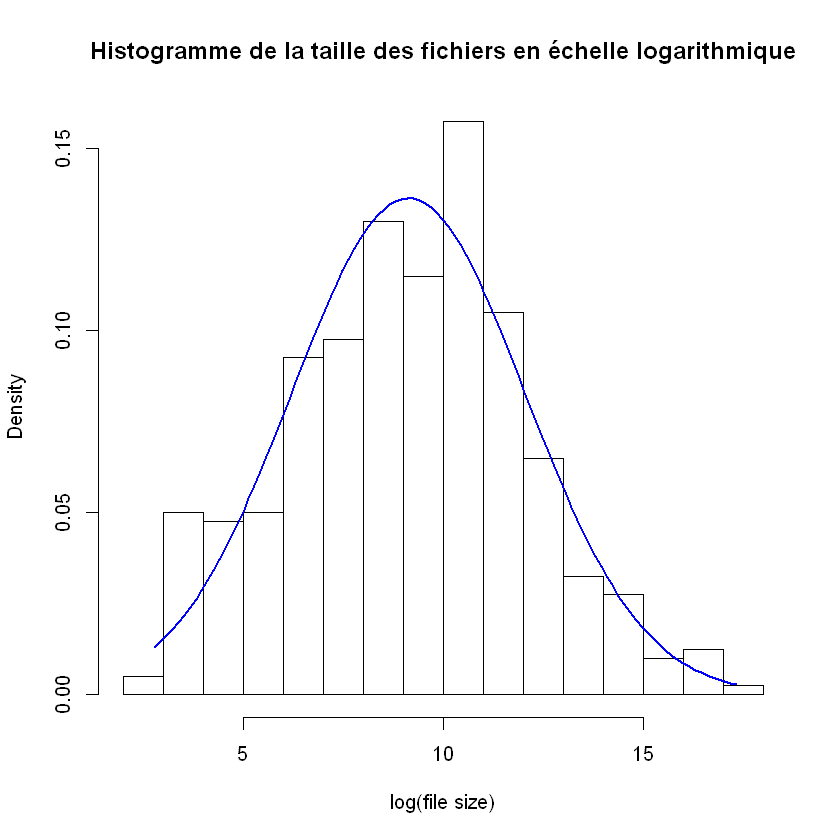

In [18]:
h = hist(log(mydata), breaks = 15, probability= TRUE, xlab = "log(file size)",
      main="Histogramme de la taille des fichiers en échelle logarithmique")

x <- seq(min(log(mydata)), max(log(mydata)), length = 100)
y <- dnorm( x, mean = mean(log(mydata)), sd = sd(log(mydata)))
lines(x, y, col = "blue", lwd = 2)

## Exercice 2 (Estimation ponctuelle(7 pts))

__1.__ Calculer la densité par rapport à la mesure de Lebesgue de la loi log-normale de paramètre $$\theta = (\mu,\sigma^2)$$, en utilisant un changement de variables approprié.

__Réponse:__
    Sachant que la variable $Y = \ln(x) $ aléatoire suit une loi Normal.Alors on a la fonction désité de probabilité:
    $$ P(Y \leqslant y) = \int_{-\infty}^{y} \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(y-\mu)^2}{2\sigma^2}} \mathrm dy$$
Car $Y = \ln(X)$, on fait le changement de variable et obtient
$$ P(X \leqslant x) = P(Y \leqslant \ln(x) )= \int_{-\infty}^{\ln(x)} \frac{1}{x\sqrt{2\pi\sigma^2}} e^{-\frac{(\ln(x)-\mu)^2}{2\sigma^2}} \mathrm dx$$
en outre, on a $f(x) = \frac{\mathrm dP(x)}{dx}$, on a alors
$$ f(X = x) = \frac{1}{x\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(\ln(x)-\mu)^2}{2\sigma^2}\right) $$


__2.__ Calculer l’estimateur du maximum de vraisemblance $\hat{\theta} = (\hat{\mu}, \hat{\sigma^2})$ de $\theta$. Cet estimateur
est-il biaisé ? Si oui, ce biais est-il significatif pour ce jeu de données ?

Pour ce modèle, dans le cas d'un $n-$échantillon i.i.d $X = (X_1, X_2,...,X_n)$, la log-vraisemblance s'écrit
$$ L(X,t) = -\sum_{i=1}^{n}\ln(x_i) 
            - \frac{n}{2}\ln(2\pi\sigma^2)
            - \frac{1}{2\sigma^2}\sum_{i=1}^{n}(\ln(x_i)-\mu)^2 $$
Il suffit de resoudre le système ci-dessous:

$$\begin{eqnarray} 
\frac{\mathrm d}{\mathrm d\mu} L(X,t) &=& \frac{1}{\sigma^2}\sum_{i=1}^{n}(\ln(x_i)-\mu) &=& 0\\
\frac{\mathrm d}{\mathrm d\sigma^2} L(X,t) &=& -\frac{n}{2\sigma^2}  + \frac{1}{2\sigma^4}\sum_{i=1}^{n}(\ln(x)-\mu)^2 &=& 0\\
\end{eqnarray}$$

Il en déduit que

$$\begin{eqnarray} 
\hat{\mu} &=& \frac{1}{n} \sum_{i=1}^{n}\ln(x_i) \\ 
\widehat{\sigma^2} &=& \frac{1}{n} \sum_{i=1}^{n}\left(\ln(x_i)-\hat\mu\right)^2
\end{eqnarray}$$


Sachant que, $\forall i \in \{1,2,...,n\}$, on a 
$$ 
\begin{eqnarray}
    \mathbb E\left(\ln(X_i)\right) &=& \mu \\
    \mathbb Var\left(\ln(X_i)\right) &=& \sigma^2 \\
\end{eqnarray}
$$
Pour $\hat{\mu}$, il est évident que 
$$
E(\hat{\mu}) = \frac{1}{n} \sum_{i=1}^n E(\ln X) = \mu \\
$$
Donc $\hat{\mu}$ est un estimateur sans biaisé de $\mu$.Pour $\widehat{\sigma^2}$, On a


$$
\begin{eqnarray}
\widehat{\sigma^2} &=& \frac{1}{n} \sum_{i=1}^n ( ln(X_i) - \hat{\mu})^2 \\
                   &=& \frac{1}{n} \sum_{i=1}^n \left( (ln(X_i) - \mu) + (\mu - \hat{\mu})  \right)^2 \\
                   &=& \frac{1}{n} \sum_{i=1}^n \left( (ln(X_i) - \mu)^2 + 2(ln(X_i) - \mu)(\mu - \hat{\mu}) + (\mu - \hat{\mu}) ^2 \right) \\
                   &=& \frac{1}{n} \left( 
                                   \sum_{i=1}^n (ln(X_i) - \mu)^2  
                                 + 2(\mu - \hat{\mu}) \sum_{i=1}^n  (ln(X_i) - \mu) 
                                 + n(\mu - \hat{\mu}) ^2 
                                 \right)\\      
                   &=& \frac{1}{n} \left( 
                                           \sum_{i=1}^n (ln(X_i) - \mu)^2  
                                         - 2n(\hat{\mu} - \mu)^2 
                                         + n(\mu - \hat{\mu}) ^2 
                                    \right)\\   
                   &=& \frac{1}{n} \left( 
                       \sum_{i=1}^n (ln(X_i) - \mu)^2  
                     - n(\hat{\mu} - \mu)^2 
                \right)\\  
\end{eqnarray}
$$

D'ou

$$\begin{eqnarray}
\mathbb E \left(\widehat{\sigma^2} \right)  
                   &=& \frac{1}{n} \left( 
                   \sum_{i=1}^n \mathbb E\left((ln(X_i) - \mu)^2\right)
                     - n\mathbb E\left((\hat{\mu} - \mu)^2\right) 
                \right)\\
                &=& \frac{1}{n} \left( 
                   \sum_{i=1}^n \mathbb Var\left(ln(X_i)\right)
                     - n\mathbb Var\left(\hat{\mu}\right) 
                \right)\\
                &=& \frac{n-1}{n}\sigma^2 \neq \sigma^2
\end{eqnarray}$$

Donc cette estimateur est biaisé.  Comme on a 400 observations dans ce jeu de donnée.
La différence de estimateur biaisé et celle de sans biaisé $$\frac{n}{n-1} \hat{\sigma} - \hat{\sigma}= 0.214 $$
est négligable devant le l'ordre de $\sigma^2 \approx 8.583$. On peut alors dit que ce biaisé n'est pas significatif.

In [11]:
400/399 * sd(log(mydata))^2 - sd(log(mydata))^2

[1] 0.02145882

__3.__ Représenter la loi associée pour le jeu de données considéré sur le même graphique que
la loi empirique (toujours en échelle logarithmique).

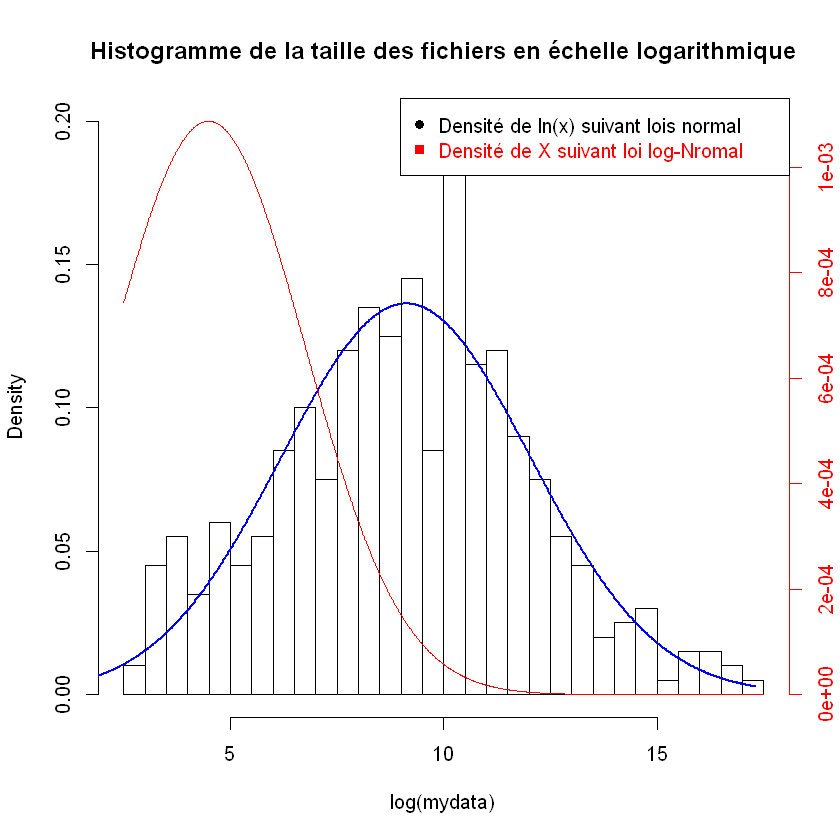

In [12]:
h = hist(log(mydata), breaks = 50, probability= TRUE,
      main="Histogramme de la taille des fichiers en échelle logarithmique")

log_x <- seq(-2, max(log(mydata)), length = 1000)
y_normal <- dnorm( log_x, mean = mean(log(mydata)), sd = sd(log(mydata)))
lines(log_x, y_normal, col = "blue", lwd = 2)

densité_lnorm <- function(x, mean, sd){
    return (1.0/(x*sqrt(2*pi*sd^2)) * exp(-(log(x)-mean)^2/(2*sd^2)))
}


#yfit_2 <- densité_lnorm(exp(xfit_2), mean(log(x)), sd(log(x)))
y_dlnorme <- dlnorm(exp(log_x), meanlog = mean(log(mydata)), sdlog = sd(log(mydata)))


par(new = TRUE)
plot(log_x, y_dlnorme, type = "l", axes = FALSE, bty = "n", xlab = "", ylab = "", col='red')
axis(4, ylim=c(0,max(y_dlnorme)), col="red",col.axis="red")

## Add Legend
legend("topright",legend=c("Densité de ln(x) suivant lois normal","Densité de X suivant loi log-Nromal"),
  text.col=c("black","red"),pch=c(16,15),col=c("black","red"))

On peut constater que le courbe de loi log-normal et le courbe antérieur ne sont pas bien superposition. Car le queue de la courbe de la densité de loi log-normal est très grand, donc son la valeur maximum de log-mormal est très petit devant celle de loi normal. Donc ici, on utilise axe longitudinal différent afin de les mettre dans le meme figure.

__4.__ Calculer le risque quadratique associé à l’estimateur $\hat{\mu}$ de $\mu$. Cet estimateur est-il efficace
?

D'après la définition de risque quadratique, on a
$$
EQM(\mu, \sigma^2; \hat{\mu}) = (b(\mu,\sigma^2;\hat{\mu}))^2 + \mathbb Var_{\mu,\sigma^2}(\hat{\mu})
$$
Comme cet estimateur est non-biasi, alors $ b(\mu,\sigma^2;\hat{\mu})$ = 0
Par conséquence, on a 
$$\begin{eqnarray}
EQM(\mu, \sigma^2; \hat{\mu}) &=& \mathbb Var_{\mu,\sigma^2}(\hat{\mu}) \\ 
    &=& \mathbb Var_{\mu,\sigma^2}(\frac{1}{n}\sum_{i=1}^{n}\ln(x_i)) \\
    &=& \frac{1}{n^2} \sum_{i=1}^{n}\mathbb Var_{\mu,\sigma^2}(\ln(x_i)) \\
    &=& \frac{\sigma^2}{n} \\
\end{eqnarray}
$$

Afin de savoir sa efficacité, il faut tout d'abord calcul la quantité de'information de Fisher:
$$ I(\mu) = - \mathbb E_{(\mu,\sigma^2)} \left(\frac{\partial^2 L}{\partial \mu^2} \left(X;\mu,\sigma^2\right)\right)
          = \frac{n}{\sigma^2}$$
          Comme $$\mathbb Var_{\mu,\sigma^2}(\hat{\mu}) = \frac{1}{I(\mu)},$$ alors on dit ce cette estimateur est efficace.

### 5 

Dans ce question, on utilise $g(\hat{\mu}) = e^{\hat{\mu}}$ estime le médian de population $e^{\hat{\mu}}$. Comme le statistique  $ g(\hat{\mu})$ est un variable aléatoir suivant un lois dont on supposons le densité  est $f(x)$.
Ainsi la fonction exponentielle est une fonction convexe, d'après Inégalité de Jensen, on a 
$$ \mathbb E(e^{\hat{\mu}}) \geqslant e^{\mathbb E(\hat{\mu})}  = e^{\mu}.$$ Les deux membres de cette inégalité sont égaux (si et) seulement si la désité de $\hat{\mu}$ est constante μ-presque partout, autrement dit, $\hat{\mu}$ suit le loi uniforme. Mais d'après la théorème central limite, on sait que $\hat{\mu} \sim \mathcal N(\mu, \frac{\sigma^2}{n})$. 
Donc les deux membres ne sont pas égale. 

Par conséquence, Cet estimateur est biaisé, dont il n'est pas efficace.

 Calcul numérique pour la médian empirique:

In [23]:
median(mydata)

[1] 9688

Calcul numérique pour la valeur obtenue pour ce jeu de données:

In [1]:
exp(mean(log(mydata)))

[1] 9072.525

### 6 

Comme $ \ln(X) \sim \mathcal N(\mu,\sigma^2) $. Donc $\frac{\ln(x) - \mu}{\sigma^2} \sim \mathcal N(0,1)$. 
$$\begin{eqnarray}
 & P_{\theta}\left(X \leq q(\theta)\right) &=& 0.95 \\
\iff & P_{\theta}\left(\frac{\ln(x) - \mu}{\sigma} \leq \frac{\ln(q(\theta)) - \mu}{\sigma^2}\right)  &=& 0.95 \\
\implies & Q(0.95) = \frac{\ln(q(\theta)) - \mu}{\sigma}\\
\end{eqnarray}$$
$Q(x)$ est la fonction qantile de la loi normal standard. On peut alors utilise $\hat \ln(q(X)) =  \hat\sigma Q(0.95) + \hat{\mu}$ estime le $ log(q(\theta))$.
D'après Inégalité de Jensen, on a 
$$\begin{eqnarray}
\mathbb E(\ln(q(\theta)) &=& Q(0.95)\mathbb E(\sqrt{\widehat\sigma^2}) + \mathbb E(\hat\mu) \\
                       &\leq& Q(0.95)\sqrt{\mathbb E(\widehat\sigma^2）}) + \mathbb E(\hat\mu) \\
                       &\leq& Q(0.95)\sigma + \mu \\
\end{eqnarray}$$
Comme $\widehat{\sigma^2} \sim \mathcal\chi(n-1)$, alors on ne prend pas l'égalité dans ce l'inéqualité. En conclusion, cet estimateur est baisé.

Calcul numérique de $q(\theta)$ pour la loi empirique:

In [4]:
qlnorm(p=0.95, mean=mean(log(mydata)),sd=sd(log(mydata)))

[1] 1116841

Calcul numérique de $q(\theta)$ pour la valeur obtenue pour ce jeu de données:

In [8]:
exp(sqrt(399/400)*sd(log(mydata))*qnorm(p=0.95, mean=0, sd=1)+mean(log(mydata)))

[1] 1110137

## Exercice 3  Taille de fichiers et modélisation Bayésienne (7 pts)

### 1 A faire

In [12]:
mean(log(mydata))

[1] 9.113006

### 2

Comme  $\lambda \sim \mathcal{\Gamma}(a,b)$, alors
$$
\begin{cases}
    \mathbb E_\pi(\lambda) &=& \frac{a}{b}&=&1 \\
    \mathbb Var_\pi(\lambda) &=& \frac{a}{b^2} &=&10 \\
\end{cases}
$$
Il en déduit que
$$
\begin{cases}
    a &=& 0.1 \\
    b &=& 0.1 \\
\end{cases}
$$

### 3

Sachant que $\lambda \sim \mathcal{Gamma}(a,b) $ et $ Y=\ln(X)\sim \mathcal N(\mu, \frac{1}{\lambda})$, alors on a

$$\begin{cases}
    \pi(\lambda) &=& \frac{\lambda^{a-1} \exp(-b\lambda)}{\Gamma(a)b^a}\\
    f(Y_1 = y_1, Y_2 = y_2..., Y_n = y_n|\lambda) &=& \prod_{i=1}^{n} \sqrt{\frac{\lambda }{2\pi}} exp(-\frac{\lambda(y_i-\mu)^2}{2})\\
    &=& {\frac{\lambda^{n/2} }{\sqrt{2\pi}^n}} \exp\left(-\frac{\lambda}{2}\sum_{i=1}^{n}(x_i-\mu)^2\right)
\end{cases}$$

On a donc
$$\begin{eqnarray}
    p(\lambda | Y_1 = y_1, Y_2 = y_2..., Y_n = y_n) 
    &\propto& f(Y_1 = y_1, Y_2 = y_2..., Y_n = y_n | \lambda)\pi(\lambda)  \\
    &\propto& \lambda^{a-1+\frac{n}{2}}exp(-\lambda(\frac{1}{2}\sum_{i=1}^n(y_i-\mu)^2+b))
\end{eqnarray}
$$
Il en déduit que
$$
\lambda|(X_1,...,X_n)\sim\mathcal{G}amma(a+\frac{n}{2},b+\frac{1}{2}\sum_{i=1}^n(log(X_i)-\mu)^2)
$$

Calcule numerique:

In [69]:
print(0.1+400/2)

[1] 200.1


In [70]:
mu = mean(log(mydata))
0.1 + 0.5 * sum((log(mydata) - mu)^2)

[1] 1708.233

$$
\begin{eqnarray}
a+\frac{n}{2} &=& 200.1 \\
b+\frac{1}{2}\sum_{i=1}^n(log(X_i)-\mu)^2) &=& 1708.23
\end{eqnarray}
$$

$$
\lambda|(X_1,...,X_n)\sim\mathcal Gamma(200.1,1708.23)
$$

### 4

$$
\begin{eqnarray}
\mathbb{E}[\lambda|X_1=x_1,...,X_n &=& x_n]&=&\frac{a+\frac{n}{2}}{b+\frac{1}{2}\sum_{i=1}^n(ln(x_i)-\mu)^2} &&\\
\lim_{n\rightarrow+\infty} \mathbb{E}[\lambda|X_1=x_1,...,X_n &=& x_n] &=& 
\frac{n}{\sum_{i=1}^n(ln(x_i)-\mu)^2} &=&\mathbb{E}[\hat{\lambda}]
\end{eqnarray}
$$

### 5

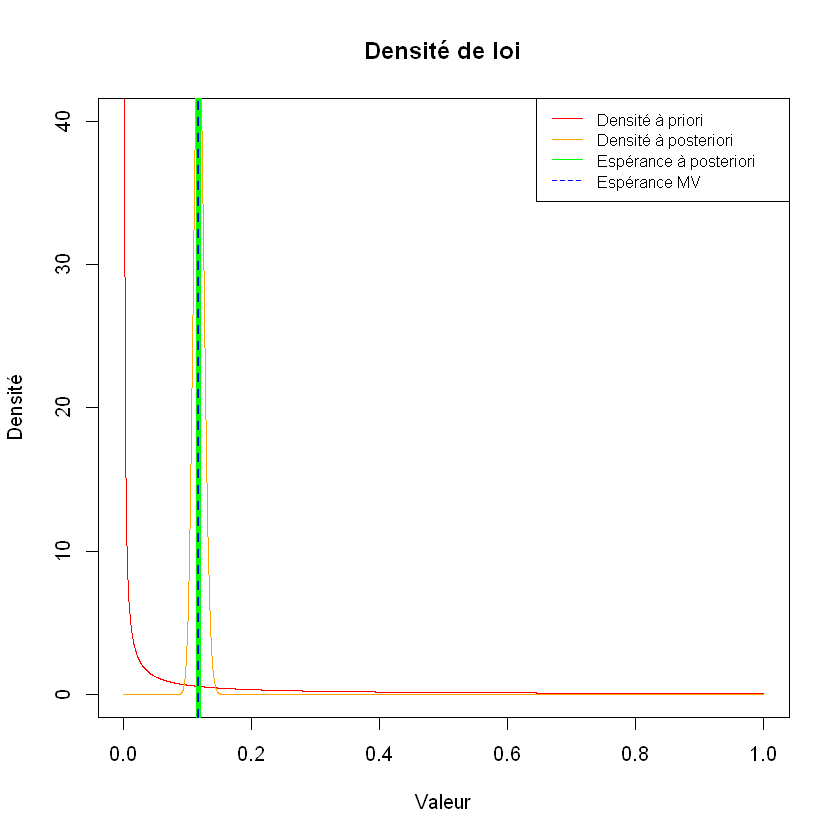

In [71]:
margin = seq(0,1,length=5000)  
apriori = dgamma(margin, shape=0.1, scale=10) 

plot(x=margin,y=apriori,col="red",type="l",ylim=c(0,40),main="Densité de loi",xlab="Valeur",ylab="Densité")

posteriori = dgamma(margin, shape=200.1, scale=1/1708.3) 
lines(x=margin,y=posteriori,col="orange",type="l")

abline(v=200.1/1708.3, col="green", lwd = "4")
abline(v=400/399/var(log(mydata)), col="blue", lwd = "2", lty = 2)


legend("topright",legend=c("Densité à priori","Densité à posteriori","Espérance à posteriori","Espérance MV"),col=c("red","orange","green","blue"),lty=c(1,1,1,2), cex=0.8)


### 6

## Exercice 4

### 1.

On sais que $\frac{1}{\sigma^2}\varphi(X_1,X_2,...,X_n) \sim \chi^2(n-1) $

$$
\begin{eqnarray}
H_0 &:\sigma^2\leq8;\\
H_1 &:\sigma^2>8;\\
\end{eqnarray}
$$

La région de refusé est donc
$$
D =\{\varphi :  \frac{1}{8}\varphi  > \chi^2_{(n-1)}(1-\alpha)\}
$$ 
Donc la region de acception est 
$$
D_a = \left[0,8\chi^2_{(n-1)}(0.95)\right]
$$


### 2

Dans le jeu de données considéré, on accepte $H_0$.

In [72]:
L = 8 * qchisq(p=0.95, df = 399)
Accepte = sd(log(mydata))^2*400 <= L
Accepte

[1] TRUE

D'après exo 4.1,
$$
$$
\begin{eqnarray}
H_0 &:\sigma^2\leq \sigma^2_{max};\\
H_1 &:\sigma^2>\sigma^2_{max}\\
\end{eqnarray}
$$
la région d'acception

$$
D_a = \left[0,\sigma^2_{max}\chi^2_{(n-1)}(1-\alpha)\right]
$$


$$\sigma_{\max}\leq\sqrt{\frac{\varphi\left(X_1,...,X_n\right)}{Q(1-\alpha)}}$$

Donc le seuil minimal 
$$
\sigma_0 = \sqrt{\frac{\varphi\left(X_1,...,X_n\right)}{Q(1-\alpha)}}
$$

In [73]:
seuil = sqrt(sd(log(mydata))^2 * 400 / qchisq(p=0.95,df = 399))
seuil

[1] 2.769316